# Model $\theta^0+\frac{(t\theta^1)^2}{2}$

In [1]:
%run "MBAM_codes.py"

## Razlučiv

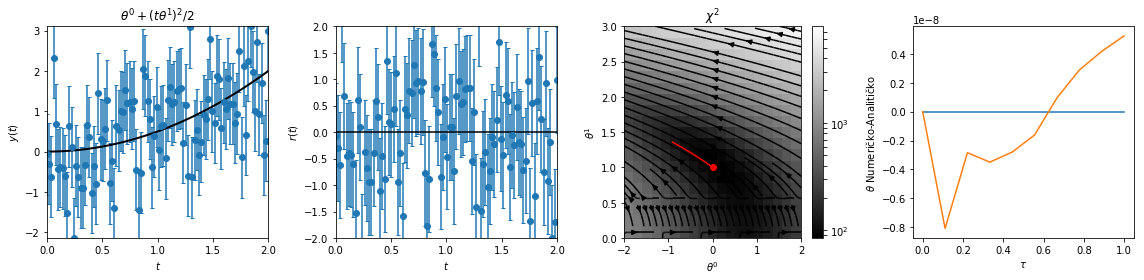

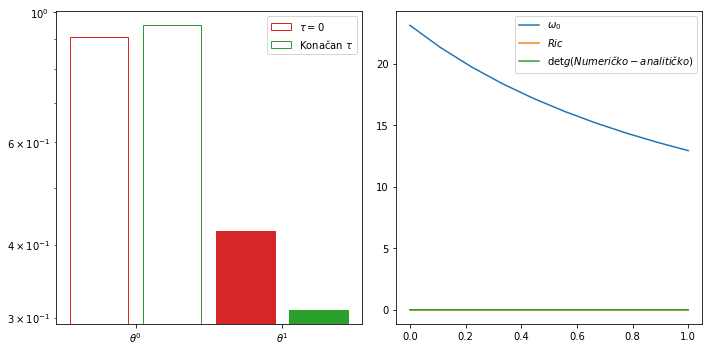

In [15]:
class model(MBAM_plotting):
    def __init__(self,*args,**kwargs):
        MBAM_plotting.__init__(self,self._model,'Kvadratan/kvadratni_razluciv',*args,**kwargs)
        self._title = r'$\theta^0+(t\theta^1)^2/2$'
    def _model(self,T,θ):
        x1,x2=θ
        return np.power(x2*T,2.)/2.+x1
    def analitic(self,θ,x,σ,τ):
        n = 2.
        g = np.array([[np.sum(1/σ**2),θ[1]**(n-1)*np.sum(x**n/σ**2)],
                      [θ[1]**(n-1)*np.sum(x**n/σ**2),θ[1]**(2*n-2)*np.sum(x**(2*n)/σ**2)]])
        λ, v = np.linalg.eigh(g)
        v = v[:,0]
        def Θ(τ):
            return np.array([v[0]*τ+θ[0],θ[1]**(1-1/n)*(θ[1]+n*v[1]*τ)**(1/n)])
        def gt(τ):
            Θ=np.array([v[0]*τ+θ[0],θ[1]**(1-1/n)*(θ[1]+n*v[1]*τ)**(1/n)])
            return np.linalg.det(np.array([[np.sum(1/σ**2),Θ[1]**(n-1)*np.sum(x**n/σ**2)],
                      [Θ[1]**(n-1)*np.sum(x**n/σ**2),Θ[1]**(2*n-2)*np.sum(x**(2*n)/σ**2)]]))
        sc = solution_class(g=g,
                            λ0=λ[0],
                            θ=np.array([Θ(tt) for tt in τ]),
                            detg=np.array([gt(tt) for tt in τ]))
        sc.strip()
        sc.array()
        return sc
N_D = 100
σ   = 1
bf  = np.array([0.,1.])
X   = np.linspace(0,2,N_D)
Y   = np.random.normal(0,σ,N_D)+model._model(model,X,bf)
MPL = model(X,Y,Y/Y,bf,xlim=[-2,2],ylim=[0,3])

θ1, θ2, X, Y,ALL=MPL.apply_on_mesh(20,[lambda θ:MPL.χ2(θ),
                                       lambda θ:np.linalg.eigh(MPL.g(θ))[1][0,0],
                                       lambda θ:np.linalg.eigh(MPL.g(θ))[1][1,0]])
MPL.MBAM = MPL.run_MBAM(bf,k=0,T=np.linspace(0,1.,10))
MPL.MBAM_a = MPL.analitic(MPL.θ_bf,MPL.t,MPL.σ,MPL.MBAM.τ)

f,ax = plt.subplots(1,4,figsize=(4*4,4))
MPL.plot_data(ax[:2])
MPL.plot_scalar(ax[2],X,Y, ALL[:,:,0], ALL[:,:,1], ALL[:,:,2])
ax[0].set_title(MPL._title)
ax[2].plot(MPL.MBAM.θ[:,0],MPL.MBAM.θ[:,1],'r')
ax[2].set_title('$\chi^2$')
ax[3].plot(MPL.MBAM.τ,MPL.MBAM.θ-MPL.MBAM_a.θ)
ax[3].set_ylabel(r'$\theta$ Numeričko-Analitičko ')
ax[3].set_xlabel(r'$\tau$')
f.tight_layout()
f.savefig(MPL.NAME+'_model.pdf')

f,axs = plt.subplots(1,2,figsize=(10,5))
MPL.bar_plot(axs[0],np.linalg.eigh(MPL.g(MPL.MBAM.θ[0]))[1][0,:],
             np.linalg.eigh(MPL.g(MPL.MBAM.θ[-1]))[1][0,:],colors=['C3','C2'],
             labels=[r"$\tau=0$",r"Konačan $\tau$"])
axs[1].plot(MPL.MBAM.τ,MPL.MBAM.ω0,label='$\omega_0$')
axs[1].plot(MPL.MBAM.τ,MPL.MBAM.R,label='$Ric$')
axs[1].plot(MPL.MBAM.τ,MPL.MBAM.detg-MPL.MBAM_a.detg,label='$\det g (Numeričko-analitičko)$')
axs[1].legend()
f.tight_layout()
f.savefig(MPL.NAME+'_barplot.pdf')

## Nerazlučiv

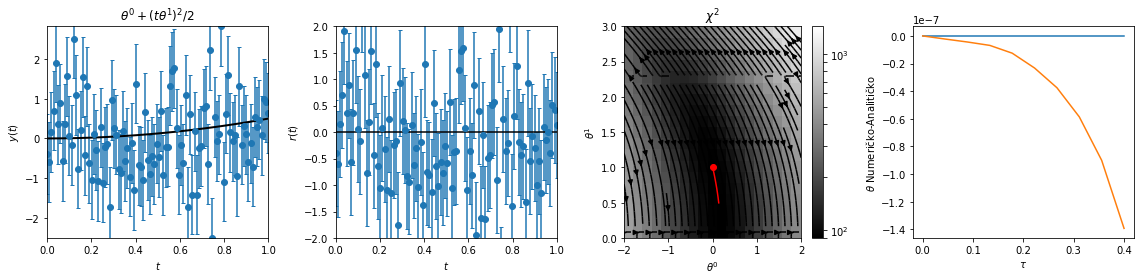

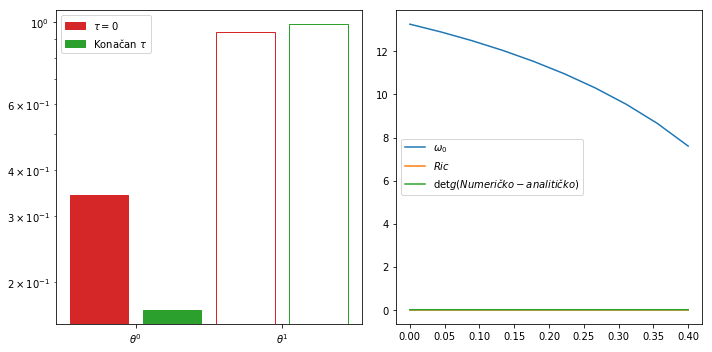

In [16]:
class model(MBAM_plotting):
    def __init__(self,*args,**kwargs):
        MBAM_plotting.__init__(self,self._model,'Kvadratan/kvadratni_nerazluciv',*args,**kwargs)
        self._title = r'$\theta^0+(t\theta^1)^2/2$'
    def _model(self,T,θ):
        x1,x2=θ
        return np.power(x2*T,2.)/2.+x1
    def analitic(self,θ,x,σ,τ):
        n = 2.
        g = np.array([[np.sum(1/σ**2),θ[1]**(n-1)*np.sum(x**n/σ**2)],
                      [θ[1]**(n-1)*np.sum(x**n/σ**2),θ[1]**(2*n-2)*np.sum(x**(2*n)/σ**2)]])
        λ, v = np.linalg.eigh(g)
        v = v[:,0]
        def Θ(τ):
            return np.array([v[0]*τ+θ[0],θ[1]**(1-1/n)*(θ[1]+n*v[1]*τ)**(1/n)])
        def gt(τ):
            Θ=np.array([v[0]*τ+θ[0],θ[1]**(1-1/n)*(θ[1]+n*v[1]*τ)**(1/n)])
            return np.linalg.det(np.array([[np.sum(1/σ**2),Θ[1]**(n-1)*np.sum(x**n/σ**2)],
                      [Θ[1]**(n-1)*np.sum(x**n/σ**2),Θ[1]**(2*n-2)*np.sum(x**(2*n)/σ**2)]]))
        sc = solution_class(g=g,
                            λ0=λ[0],
                            θ=np.array([Θ(tt) for tt in τ]),
                            detg=np.array([gt(tt) for tt in τ]))
        sc.strip()
        sc.array()
        return sc
N_D = 100
σ   = 1
bf  = np.array([0.,1.])
X   = np.linspace(0,1,N_D)
Y   = np.random.normal(0,σ,N_D)+model._model(model,X,bf)
MPL = model(X,Y,Y/Y,bf,xlim=[-2,2],ylim=[0,3])

θ1, θ2, X, Y,ALL=MPL.apply_on_mesh(20,[lambda θ:MPL.χ2(θ),
                                       lambda θ:np.linalg.eigh(MPL.g(θ))[1][0,0],
                                       lambda θ:np.linalg.eigh(MPL.g(θ))[1][1,0]])
MPL.MBAM = MPL.run_MBAM(bf,k=0,T=np.linspace(0,.4,10))
MPL.MBAM_a = MPL.analitic(MPL.θ_bf,MPL.t,MPL.σ,MPL.MBAM.τ)

f,ax = plt.subplots(1,4,figsize=(4*4,4))
MPL.plot_data(ax[:2])
MPL.plot_scalar(ax[2],X,Y, ALL[:,:,0], ALL[:,:,1], ALL[:,:,2])
ax[0].set_title(MPL._title)
ax[2].plot(MPL.MBAM.θ[:,0],MPL.MBAM.θ[:,1],'r')
ax[2].set_title('$\chi^2$')
ax[3].plot(MPL.MBAM.τ,MPL.MBAM.θ-MPL.MBAM_a.θ)
ax[3].set_ylabel(r'$\theta$ Numeričko-Analitičko ')
ax[3].set_xlabel(r'$\tau$')
f.tight_layout()
f.savefig(MPL.NAME+'_model.pdf')

f,axs = plt.subplots(1,2,figsize=(10,5))
MPL.bar_plot(axs[0],np.linalg.eigh(MPL.g(MPL.MBAM.θ[0]))[1][0,:],
             np.linalg.eigh(MPL.g(MPL.MBAM.θ[-1]))[1][0,:],colors=['C3','C2'],
             labels=[r"$\tau=0$",r"Konačan $\tau$"])
axs[1].plot(MPL.MBAM.τ,MPL.MBAM.ω0,label='$\omega_0$')
axs[1].plot(MPL.MBAM.τ,MPL.MBAM.R,label='$Ric$')
axs[1].plot(MPL.MBAM.τ,MPL.MBAM.detg-MPL.MBAM_a.detg,label='$\det g (Numeričko-analitičko)$')
axs[1].legend()
f.tight_layout()
f.savefig(MPL.NAME+'_barplot.pdf')